In [1]:
import cirq
import matplotlib.pyplot as plt

In [2]:
def prepare_initial_state(qubits, zbasis):
    instructions = []
    for i, qubit in enumerate(qubits[1:]):
        if zbasis[i] == 1:
            instructions.append(cirq.X(qubit))
    return instructions

In [3]:
def cswap_test(x):
    qubits = cirq.LineQubit.range(3)
    circuit = cirq.Circuit(
        *prepare_initial_state(qubits, x),
        cirq.H(qubits[0]),
        cirq.CSWAP(*qubits),
        cirq.H(qubits[0]),
        cirq.measure(qubits[0], key='m')
    )
    sim = cirq.Simulator()
    result = sim.run(circuit, repetitions=1000)
    return circuit, result.histogram(key='m')

In [4]:
circuit, _ = cswap_test([0,1])
print(circuit)

0: ───H───@───H───M('m')───
          │
1: ───────×────────────────
          │
2: ───X───×────────────────


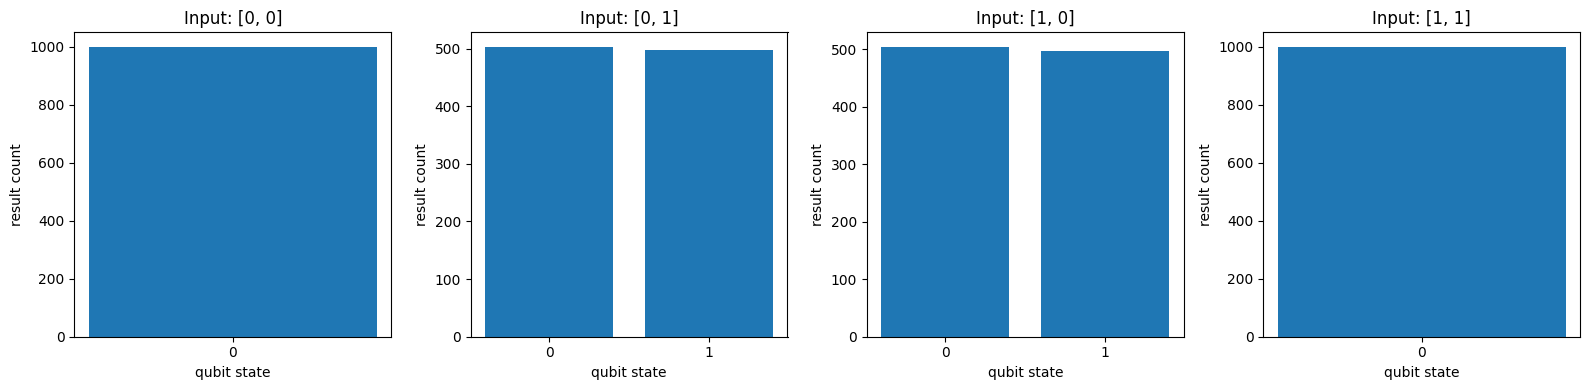

In [5]:
states = [
    [0,0],
    [0,1],
    [1,0],
    [1,1]
]

fig, ax = plt.subplots(1,4, figsize=(16, 4))
for i, state in enumerate(states):
    _, res = cswap_test(state)
    cirq.plot_state_histogram(res, ax=ax[i])
    ax[i].set_title(f'Input: {state}')
plt.tight_layout()
plt.show()